In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [3]:
# MNIST digits dataset
train_dataset = dsets.MNIST(root='./data',
                        train=True,
                        download=True,
                        transform=pipeline) 
test_dataset = dsets.MNIST(root='./data',
                       train=False,
                       download=True,
                       transform=pipeline)

# pick all samples to train, size = 60,000
train_data = torch.unsqueeze(train_dataset.data, dim=1).type(
    torch.FloatTensor)[:]/255
train_target = train_dataset.targets

# pick all samples to test, size = 10,000
test_data = torch.unsqueeze(test_dataset.data, dim=1).type(
    torch.FloatTensor)[:]/255
test_target = test_dataset.targets

In [4]:
# reshape train and test dim
train_data = train_data.view(-1, 28*28)
test_data = test_data.view(-1, 28*28)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
test_data, val_data, test_target, val_target = train_test_split(test_data, test_target, test_size=0.5, random_state=84)

In [7]:
val_accuracies = []
test_accuracies = []
error_num = []
kVals = range(1, 10)
for k in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_target)
    
    val_score = model.score(val_data, val_target)
    test_score = model.score(test_data, test_target)
    res = model.predict(test_data)
    error = 0
    for i in range(len(test_target)):
        if res[i] != test_target[i]:
            error += 1
    error_num.append(error)
    print('k=%d, val_accuracy=%.3f%%,\t test_accuracy=%.3f%%\t error number:%d' %(k, val_score * 100, test_score * 100, error))
    val_accuracies.append(val_score)
    test_accuracies.append(test_score)
    
    
    # 预测验证集
idx_val = np.argmax(val_accuracies)
idx_test = np.argmax(test_accuracies)
print("k={} achieved highest val_accuracy of {:.2f}% on validation data," \
      "k={} achieved highest val_accuracy of {:.2f}% on validation" \
      "data".format(kVals[idx_val], val_accuracies[idx_val] * 100, kVals[idx_test], test_accuracies[idx_test] * 100))

k=1, val_accuracy=96.680%,	 test_accuracy=97.140%	 error number:143
k=2, val_accuracy=96.240%,	 test_accuracy=96.300%	 error number:185
k=3, val_accuracy=96.860%,	 test_accuracy=97.240%	 error number:138
k=4, val_accuracy=96.720%,	 test_accuracy=96.920%	 error number:154
k=5, val_accuracy=96.680%,	 test_accuracy=97.080%	 error number:146
k=6, val_accuracy=96.640%,	 test_accuracy=96.900%	 error number:155
k=7, val_accuracy=96.780%,	 test_accuracy=97.100%	 error number:145
k=8, val_accuracy=96.580%,	 test_accuracy=96.820%	 error number:159
k=9, val_accuracy=96.420%,	 test_accuracy=96.760%	 error number:162
k=3 achieved highest val_accuracy of 96.86% on validation data,k=1 achieved highest val_accuracy of 97.14% on validationdata


In [9]:
import pandas as pd
data = {'k': kVals, 'val_accuracy': val_accuracies, 'test_accuracy': test_accuracies, 'error number':error_num}
df = pd.DataFrame(data)
df.to_csv('../../期末作业/手写数字体识别临时文件/不同k对应的accuracy.csv', index=False)

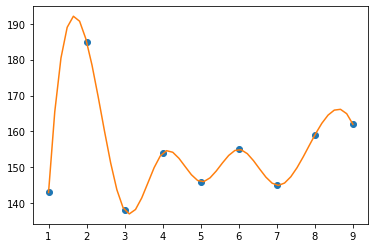

In [24]:
# from scipy.interpolate import interp1d
# f = interp1d(kVals, error_num, kind='cubic')
# xnew = np.linspace(1, 9, num=50, endpoint=True)
# plt.plot(kVals, error_num,'o', xnew, f(xnew))

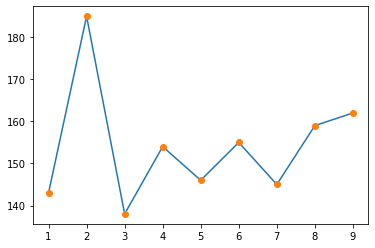

In [31]:
# plt.plot(kVals, error_num, kVals, error_num, 'o')
# # plt.savefig('../../期末作业/figures/错误数字图.png', dpi=900)

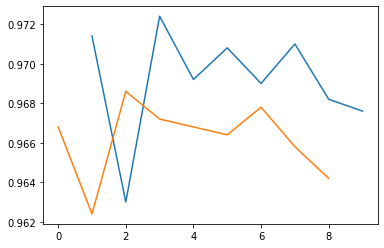

In [14]:
# plt.plot(kVals, test_accuracies, val_accuracies)

In [35]:
model = KNeighborsClassifier(n_neighbors=kVals[idx_val])
model.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=3)

In [36]:
predictions = model.predict(test_data)
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       472
           1       0.96      1.00      0.98       555
           2       0.98      0.96      0.97       500
           3       0.97      0.98      0.97       528
           4       0.97      0.98      0.97       496
           5       0.97      0.96      0.96       459
           6       0.99      0.99      0.99       462
           7       0.97      0.97      0.97       517
           8       1.00      0.94      0.97       496
           9       0.97      0.97      0.97       515

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

